In [32]:
# Imprt required libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


In [11]:
# Merge 12 months of sales data into a single file
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [12]:
# Read in updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Clean up the data

In [18]:
# Drop rows of NaN
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [20]:
# Find 'Or' and delete it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [ ]:
# Convert columns to correct type

In [26]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [13]:
# Augment data with additionla columns


In [22]:
# Add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [23]:
# Add a sales column

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question 1: What was the best month for sales, and how much was earned that month.

In [33]:
results = all_data.groupby('Month').sum()
print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


In [31]:
# Visualize data

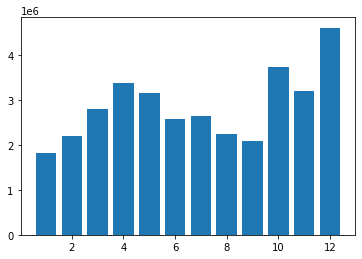

In [34]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.show()